In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split#模型选择
from sklearn.preprocessing import LabelEncoder#预处理
from sklearn.decomposition import PCA#主成分分析

from sklearn.naive_bayes import GaussianNB#高斯朴素贝叶斯算法

from collections import Counter
import math

## 知识点

1. 字节型数据转换为字符串数据

> str(meta[b'label_names'][i])#将b'label_names'转换为字符串"b'label_names'"
 
> meta[b'label_names'][i].decode("utf-8")#将字节型数据转换成字符串型数据



## CIFAR10数据集

CIFAR-10共有60000张图片,共有10个分类,每个分类大概6000张

训练集共有50000张图片,测试集共有10000张图片,训练集每个分类约有5000张图片,测试集每个分类约有1000张图片

训练集分5个批次,每个批次约有10000张图片,测试集只有一个批次,该批次有10000张图片

In [29]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_batch = {}
cifar_batch[0] = unpickle("E:\scikit_learn_data\cifar-10-batches-py\data_batch_5")
cifar_batch[1] = unpickle("E:\scikit_learn_data\cifar-10-batches-py\data_batch_1")
cifar_batch[2] = unpickle("E:\scikit_learn_data\cifar-10-batches-py\data_batch_2")
cifar_batch[3] = unpickle("E:\scikit_learn_data\cifar-10-batches-py\data_batch_3")
cifar_batch[4] = unpickle("E:\scikit_learn_data\cifar-10-batches-py\data_batch_4")
cifar_test = unpickle("E:\scikit_learn_data\cifar-10-batches-py\\test_batch")
cifar_batch_meta = unpickle("E:\scikit_learn_data\cifar-10-batches-py\\batches.meta")
 
print("the keys of cifar:           ",cifar_batch[0].keys())
print("the batch_label of cifar:    ",cifar_batch[0][b'batch_label'])
# print("the filenames of cifar:      ",cifar_batch[0][b'filenames'])
print("the data shape of cifar:     ",cifar_batch[0][b'data'].shape)
print("the image shape of cifar:     ",cifar_batch[0][b'data'][0].shape)
print("the labels size of cifar:   ",len(cifar_batch[0][b'labels']))

print("the meta keys of cifar:           ",cifar_batch_meta.keys())
print("the num_cases_per_batch of cifar: ",cifar_batch_meta[b'num_cases_per_batch'])
print("the label_names of cifar:         ",cifar_batch_meta[b'label_names'])
print("the num_vis of cifar:             ",cifar_batch_meta[b'num_vis'])

print(cifar_batch[0][b'labels'][1:10])



the keys of cifar:            dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
the batch_label of cifar:     b'training batch 5 of 5'
the data shape of cifar:      (10000, 3072)
the image shape of cifar:      (3072,)
the labels size of cifar:    10000
the meta keys of cifar:            dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
the num_cases_per_batch of cifar:  10000
the label_names of cifar:          [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
the num_vis of cifar:              3072
[8, 5, 1, 5, 7, 4, 3, 8, 2]


b'automobile'
b'ship'
b'dog'
b'automobile'
b'dog'
(32, 32, 3)


C:\Users\12569\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


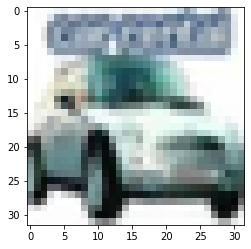

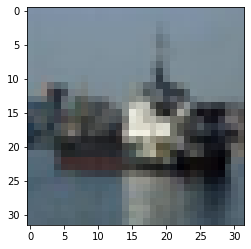

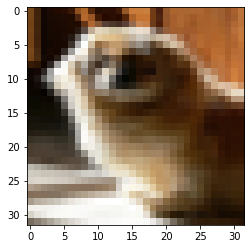

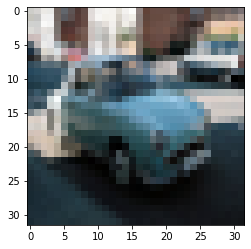

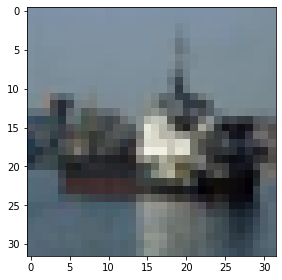

In [32]:
#matplotlib显示
for i in range(5):
    plt.figure()#新显示一张图片
    pic=cifar_batch[0][b'data'][i].reshape(3,32,32)#由于图像在拆分的时候是按行列通道（32,32,3）的顺序，所以在复原的时候应该反过来
    print(cifar_batch_meta[b'label_names'][cifar_batch[0][b'labels'][i]])#输出该图片标签对应的图片类别
    pic=pic.transpose(1,2,0)
    plt.imshow(pic) # 显示图片
    plt.show()

#skimage显示
from skimage import io, exposure, img_as_uint, img_as_float
pic=cifar_batch[0][b'data'][1].reshape(3,32,32)#由于图像在拆分的时候是按行列通道（32,32,3）的顺序，所以在复原的时候应该反过来
pic=pic.transpose(1,2,0)
# print(pic)
print(pic.shape)
io.imshow(pic)

### 彩色图像变灰度图像

In [25]:
from PIL import Image
pic=cifar_batch[0][b'data'][1].reshape(3,32,32)#由于图像在拆分的时候是按行列通道（32,32,3）的顺序，所以在复原的时候应该反过来
pic=pic.transpose(1,2,0)

image = Image.fromarray(pic)
print(image.mode) ## 打印模式属性
image = image.convert('L')
print(image.mode) ## 打印模式属性
image.show()#注意Image的图像显示是调用win自带的显示模式，也就是默认的显示软件显示

RGB
L


### 读取图片并将其保存

In [102]:
#用于将cifar10的数据可视化
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from PIL import Image
import os

def load_CIFAR_batch(filename):
    with open(filename, 'rb')as f:
        datadict = p.load(f,encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return X, Y

def load_CIFAR_Labels(filename):
    with open(filename, 'rb') as f:
        lines = [x for x in f.readlines()]
        print(lines)
        
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
def picture_pack(label,img,step):
    os.mkdir("E:\scikit_learn_data\cifar-10-batches-py\picture\ "+ meta[b'label_names'][i].decode("utf-8"))

if __name__ == "__main__":
    meta = unpickle("E:\scikit_learn_data\cifar-10-batches-py\\batches.meta")#字典格式
    imgX, imgY = load_CIFAR_batch("E:\scikit_learn_data\cifar-10-batches-py\\data_batch_1")
    
    #os.mkdir("E:\scikit_learn_data\cifar-10-batches-py\\picture")
    for i in range(10):
        a = i
#         picture_pack(imgY[i],imgX[i],i)

    for i in range(1000):#
        imgs = imgX[i]
        img0 = imgs[0]
        img1 = imgs[1]
        img2 = imgs[2]
        i0 = Image.fromarray(img0)#从数据，生成image对象
        i1 = Image.fromarray(img1)
        i2 = Image.fromarray(img2)
        img = Image.merge("RGB",(i0,i1,i2))#混合得到图像
        
        pic_label = meta[b'label_names'][imgY[i]].decode("utf-8")
        img.save("E:\scikit_learn_data\cifar-10-batches-py\picture\ "+pic_label+"\ "+str(i)+ ".png","png")#文件夹下是RGB融合后的图像
        
#         for j in range(imgs.shape[0]):
#                 img = imgs[j]
#                 name = "img" + str(i) + str(j) + ".png"
#                 print("正在保存图片" + name)
#                 plimg.imsave("E:\scikit_learn_data\cifar-10-batches-py\cifar10_images\ " + name, img)#文件夹下是RGB分离的图像
        
    print("保存完毕.")

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
保存完毕.


## 使用卷积神经网络对CIFAR10分类（Keras环境）

In [33]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


classes_num = 10
batch_size = 20
epochs_num = 20

def quality_classify_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes_num))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def train():
    # 数据载入
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # 多分类标签生成
    y_train = keras.utils.to_categorical(y_train, classes_num)
    y_test = keras.utils.to_categorical(y_test, classes_num)
    # 生成训练数据
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    model = quality_classify_model()
    hist = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), shuffle=True)

#     model.save('./change_model/cifar10_model.hdf5') 
#     model.save_weights('./change_model/cifar10_model_weight.hdf5')

    print(hist.history.keys())
    print("train acc:",hist_dict['acc'])
    print("validation acc:",hist_dict['val_acc'])
   
    train_acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    # 绘图
    epochs = range(1, len(train_acc)+1)
    plt.plot(epochs, train_acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig("accuracy.png")
    
    plt.figure() # 新建一个图
    plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig("loss.png")
    
train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 2.1199 - accuracy: 0.2102 - val_loss: 1.9141 - val_accuracy: 0.3227
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.8826 - accuracy: 0.3033 - val_loss: 1.7139 - val_accuracy: 0.4010
Epoch 3/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.7600 - accuracy: 0.3509 - val_loss: 1.6584 - val_accuracy: 0.4029
Epoch 4/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.6876 - accuracy: 0.3803 - val_loss: 1.5487 - val_accuracy: 0.4456
Epoch 5/10
50000/50000 [==============================] - 73s 1ms/step - loss: 1.6271 - accuracy: 0.4022 - val_loss: 1.4981 - val_accuracy: 0.4569
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5848 - accuracy: 0.4224 - val_loss: 1.4584 - val_accuracy: 0.4825
Epoch 7/10
50000/50000 [==============================] - 73s 1ms/st

NameError: name 'hist_dict' is not defined

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


4
